🚀 启动 EfficientNet-B3 挑战模式...
⚙️  Device: NVIDIA GeForce RTX 5070 Laptop GPU
📥 正在加载 EfficientNet-B3 权重...
🏁 开始执行 EfficientNet 方案...

Epoch 1/15
LR Body: 1.0e-04


Training: 100%|██████████| 366/366 [01:03<00:00,  5.78it/s, loss=0.488]


 -> Train Loss: 0.4633 | Acc: 0.8138
 -> Val   Loss: 0.2908   | Acc: 0.8665

Epoch 2/15
LR Body: 9.9e-05


Training: 100%|██████████| 366/366 [00:58<00:00,  6.24it/s, loss=1.06]  


 -> Train Loss: 0.3277 | Acc: 0.8607
 -> Val   Loss: 2.9220   | Acc: 0.8830

Epoch 3/15
LR Body: 9.6e-05


Training: 100%|██████████| 366/366 [00:58<00:00,  6.25it/s, loss=1.09]  


 -> Train Loss: 0.2868 | Acc: 0.8805
 -> Val   Loss: 0.2971   | Acc: 0.8569

Epoch 4/15
LR Body: 9.1e-05


Training: 100%|██████████| 366/366 [00:58<00:00,  6.27it/s, loss=0.0928]


 -> Train Loss: 0.2565 | Acc: 0.8879
 -> Val   Loss: 0.2856   | Acc: 0.8665

Epoch 5/15
LR Body: 8.4e-05


Training: 100%|██████████| 366/366 [00:58<00:00,  6.30it/s, loss=3.28]  


 -> Train Loss: 0.2398 | Acc: 0.8978
 -> Val   Loss: 0.2794   | Acc: 0.8590

Epoch 6/15
LR Body: 7.5e-05


Training: 100%|██████████| 366/366 [01:02<00:00,  5.90it/s, loss=0.0317]


 -> Train Loss: 0.2128 | Acc: 0.9108
 -> Val   Loss: 0.2542   | Acc: 0.8843

Epoch 7/15
LR Body: 6.6e-05


Training: 100%|██████████| 366/366 [01:05<00:00,  5.63it/s, loss=1.01]  


 -> Train Loss: 0.1935 | Acc: 0.9163
 -> Val   Loss: 0.2357   | Acc: 0.8884

Epoch 8/15
LR Body: 5.6e-05


Training: 100%|██████████| 366/366 [01:00<00:00,  6.07it/s, loss=3.16]  


 -> Train Loss: 0.1694 | Acc: 0.9303
 -> Val   Loss: 0.2486   | Acc: 0.8953

Epoch 9/15
LR Body: 4.5e-05


Training: 100%|██████████| 366/366 [01:04<00:00,  5.65it/s, loss=0.00688]


 -> Train Loss: 0.1412 | Acc: 0.9440
 -> Val   Loss: 0.2777   | Acc: 0.8871

Epoch 10/15
LR Body: 3.5e-05


Training: 100%|██████████| 366/366 [01:03<00:00,  5.77it/s, loss=0.789]  


 -> Train Loss: 0.1372 | Acc: 0.9461
 -> Val   Loss: 0.2691   | Acc: 0.8932

Epoch 11/15
LR Body: 2.6e-05


Training: 100%|██████████| 366/366 [01:02<00:00,  5.90it/s, loss=0.0829] 


 -> Train Loss: 0.1169 | Acc: 0.9529
 -> Val   Loss: 0.2764   | Acc: 0.8946

Epoch 12/15
LR Body: 1.7e-05


Training: 100%|██████████| 366/366 [00:57<00:00,  6.33it/s, loss=1.62]   


 -> Train Loss: 0.1020 | Acc: 0.9581
 -> Val   Loss: 0.2899   | Acc: 0.8891

Epoch 13/15
LR Body: 1.0e-05


Training: 100%|██████████| 366/366 [01:03<00:00,  5.79it/s, loss=0.0104] 


 -> Train Loss: 0.0970 | Acc: 0.9617
 -> Val   Loss: 0.2907   | Acc: 0.8905

Epoch 14/15
LR Body: 5.3e-06


Training: 100%|██████████| 366/366 [00:57<00:00,  6.37it/s, loss=0.0236] 


 -> Train Loss: 0.0950 | Acc: 0.9618
 -> Val   Loss: 0.2932   | Acc: 0.8939

Epoch 15/15
LR Body: 2.1e-06


Training: 100%|██████████| 366/366 [01:04<00:00,  5.71it/s, loss=0.00165]


 -> Train Loss: 0.0881 | Acc: 0.9639
 -> Val   Loss: 0.2933   | Acc: 0.8946

训练完成! ⭐️ 最佳验证集准确率: 0.8953

🚀 正在进行 TTA 测试 (EfficientNet)...


TTA Inference: 100%|██████████| 92/92 [00:31<00:00,  2.89it/s]


🔥 TTA 最终准确率: 0.9021
✅ 结果已保存 (efficientnet_b3)！


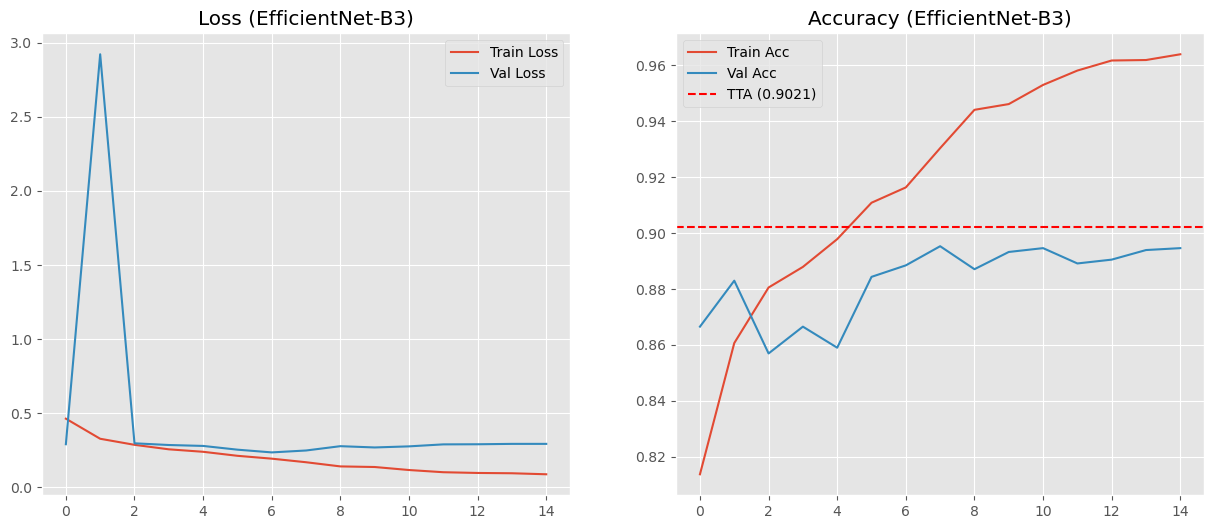

In [1]:
# =================================================================
# 阶段 3 (换帅版): EfficientNet-B3 + 差分学习率 + TTA
# =================================================================
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import copy
import time
import os
import pandas as pd
import matplotlib.pyplot as plt

# 自动安装/导入 tqdm
try:
    from tqdm import tqdm
except ImportError:
    os.system('pip install tqdm')
    from tqdm import tqdm

# 1. 参数配置
# EfficientNet 建议用 300x300 左右的分辨率 (B3原生是300)
# 我们用 256 或 224 都可以，这里提升到 256 增加一点细节
IMG_SIZE = 256
BATCH_SIZE = 16 # 显存够的话
EPOCHS = 15
NUM_WORKERS = 8

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    torch.backends.cudnn.benchmark = True

print(f"🚀 启动 EfficientNet-B3 挑战模式...")
print(f"⚙️  Device: {torch.cuda.get_device_name(0)}")

# 2. 数据准备 (强增强)
data_transforms = {
    'train': transforms.Compose([
        transforms.Grayscale(num_output_channels=1), # 依然单通道读取
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.15, contrast=0.15),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
    'val': transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]),
}

data_dir = './dataset2'
if not os.path.exists(data_dir):
    print("❌ 没找到 dataset2 文件夹！")

full_dataset = datasets.ImageFolder(data_dir, transform=data_transforms['train'])
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

val_dataset.dataset = copy.deepcopy(full_dataset)
val_dataset.dataset.transform = data_transforms['val']

dataloaders = {
    'train': DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True),
    'val': DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}
class_names = full_dataset.classes

# 3. 构建模型 (EfficientNet-B3)
def get_efficientnet_model(num_classes):
    print("📥 正在加载 EfficientNet-B3 权重...")
    # 加载预训练模型
    model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.DEFAULT)

    # --- 修改第一层 (3通道 -> 1通道) ---
    # EfficientNet 的第一层在 model.features[0][0]
    original_conv = model.features[0][0]
    model.features[0][0] = nn.Conv2d(1, 40, kernel_size=3, stride=2, padding=1, bias=False)

    # 融合 RGB 权重到单通道
    with torch.no_grad():
        model.features[0][0].weight.data = torch.mean(original_conv.weight.data, dim=1, keepdim=True)

    # --- 修改分类头 ---
    # EfficientNet 的分类器在 model.classifier[1]
    in_features = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(in_features, num_classes)

    return model

model = get_efficientnet_model(len(class_names))
model = model.to(device)

# 4. 优化器 (差分学习率 + AdamW)
# 移除了 Label Smoothing，让新模型自由发挥
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW([
    # 身体 (Features)
    {'params': model.features.parameters(), 'lr': 1e-4},
    # 头 (Classifier)
    {'params': model.classifier.parameters(), 'lr': 1e-3}
], weight_decay=1e-2)

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS, eta_min=1e-6)

# 5. 训练函数
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    start_time = time.time()

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print(f"LR Body: {optimizer.param_groups[0]['lr']:.1e}")

        model.train()
        train_loss = 0.0
        train_corrects = 0
        loop = tqdm(dataloaders['train'], desc='Training', leave=True)

        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)
            train_corrects += torch.sum(preds == labels.data)
            loop.set_postfix(loss=loss.item())

        scheduler.step()

        epoch_train_loss = train_loss / dataset_sizes['train']
        epoch_train_acc = train_corrects.double() / dataset_sizes['train']

        model.eval()
        val_loss = 0.0
        val_corrects = 0
        with torch.no_grad():
            for inputs, labels in dataloaders['val']:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)

        epoch_val_loss = val_loss / dataset_sizes['val']
        epoch_val_acc = val_corrects.double() / dataset_sizes['val']

        print(f" -> Train Loss: {epoch_train_loss:.4f} | Acc: {epoch_train_acc:.4f}")
        print(f" -> Val   Loss: {epoch_val_loss:.4f}   | Acc: {epoch_val_acc:.4f}")

        history['train_loss'].append(epoch_train_loss)
        history['val_loss'].append(epoch_val_loss)
        history['train_acc'].append(epoch_train_acc.item())
        history['val_acc'].append(epoch_val_acc.item())

        if epoch_val_acc > best_acc:
            best_acc = epoch_val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    print(f'\n训练完成! ⭐️ 最佳验证集准确率: {best_acc:.4f}')
    model.load_state_dict(best_model_wts)
    return model, history

# 6. TTA 测试
def evaluate_with_tta(model, dataloader):
    print("\n🚀 正在进行 TTA 测试 (EfficientNet)...")
    model.eval()
    corrects = 0
    total = 0

    tta_transforms = [
        transforms.Compose([]),
        transforms.Compose([transforms.RandomHorizontalFlip(p=1.0)]),
        transforms.Compose([transforms.RandomRotation(10)]),
    ]

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="TTA Inference"):
            inputs, labels = inputs.to(device), labels.to(device)
            combined_outputs = torch.zeros(inputs.size(0), len(class_names)).to(device)

            for t in tta_transforms:
                augmented_inputs = t(inputs)
                outputs = model(augmented_inputs)
                combined_outputs += outputs

            _, preds = torch.max(combined_outputs, 1)
            corrects += torch.sum(preds == labels.data)
            total += inputs.size(0)

    acc = corrects.double() / total
    print(f"🔥 TTA 最终准确率: {acc:.4f}")
    return acc.item()

# 7. 执行与保存
if __name__ == '__main__':
    print("🏁 开始执行 EfficientNet 方案...")
    final_model, final_history = train_model(model, criterion, optimizer, scheduler, num_epochs=EPOCHS)

    tta_acc = evaluate_with_tta(final_model, dataloaders['val'])

    if not os.path.exists('./models'):
        os.makedirs('./models')

    torch.save(final_model.state_dict(), './models/efficientnet_b3_5070.pth')
    pd.DataFrame(final_history).to_csv('./models/efficientnet_log.csv', index=False)

    plt.style.use('ggplot')
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.plot(final_history['train_loss'], label='Train Loss')
    plt.plot(final_history['val_loss'], label='Val Loss')
    plt.title('Loss (EfficientNet-B3)')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(final_history['train_acc'], label='Train Acc')
    plt.plot(final_history['val_acc'], label='Val Acc')
    plt.axhline(y=tta_acc, color='r', linestyle='--', label=f'TTA ({tta_acc:.4f})')
    plt.title('Accuracy (EfficientNet-B3)')
    plt.legend()

    plt.savefig('./models/efficientnet_plot.png', dpi=300)
    print("✅ 结果已保存 (efficientnet_b3)！")
    plt.show()